# Lecture 7
## Q 7.1
### Question

Pick a fixed point inside, at the boundary, and outside of a square, when rotating the square on a fixed axis, or a circle, what is the trajectory of the three points?

Set up their functions of time, and plot them, in GIF.

### Solution

Say we have a square and its base A at $x=0$ when $t=0$, the square rotates around the origin with angular velocity $\omega=\pi/2$.

Since both $x(t)$ and $y(t)$ are periodic functions, we can only plot them in a period of $t=0$ to $t=4$.

In [ ]:
% x:
if t<1
    x = 1 - cos(speed*t);
elseif t<2
    x = 2 - sqrt(2) * cos(speed*(t-1) + pi/4);
elseif t<3
    x = 3 + sin(speed*(t-2));
else
    x = 4;
end

% y:
if t<1
    y = sin(speed*t);
elseif t<2
    y = sqrt(2) * sin(speed*(t-1) + pi/4);
elseif t<3
    y = cos(speed*(t-2));
else
    y = 0;
end

Then consider drawing each point of the square, namely A, B, C, D, and the center O, we have:

In [ ]:
a = calculate(t);
b = calculate(t-1)+[1 0];
c = calculate(t+2)-[2 0];
d = calculate(t+1)-[1 0];

Finishing up the code:

In [ ]:
for t = 0:0.02:4
  a = calculate(t);
  b = calculate(t-1)+[1 0];
  c = calculate(t+2)-[2 0];
  d = calculate(t+1)-[1 0];

  p = (2*a + b)/3;
  q = (a + 2*b + 3*c + 4*d)/10;
  r = (a+b-0.3*c-0.3*d)/1.4;

  points_to_plot = [p; q; r];
  sqaure_points = [a; b; c; d; a];

  histories = cat(3, histories, points_to_plot);

  for i=1:3
    plot(sqaure_points(:,1), sqaure_points(:,2), 'k-');
    hold on

    x = reshape(histories(i,1,:), 1, []);
    y = reshape(histories(i,2,:), 1, []);
    plot(x,y,'r.');
    hold off

    grid on;
    daspect([1 1 1])
    axis([-0.5 5.5 -0.5 2.5])
    drawnow;
    frame = getframe(1);
    im = frame2im(frame);
    [imind,cm] = rgb2ind(im,256);
    if t == 0
      imwrite(imind,cm,filenames(i),'gif', 'Loopcount',inf, 'DelayTime',0.001);
    else
      imwrite(imind,cm,filenames(i),'gif','WriteMode','append', 'DelayTime',0.001);
    end
  end
end

on the boundary:

![](./week_3/imgs/Q7_1_1.gif)

inside the square:

![](./week_3/imgs/Q7_1_2.gif)

outside the square:

![](./week_3/imgs/Q7_1_3.gif)

## Q 7.2
### Question

Plot logarithmic spiral of regular pentagon, hexagon, and heptagon. Fill their colors.

### Solution

First try the simplest one, the regular square

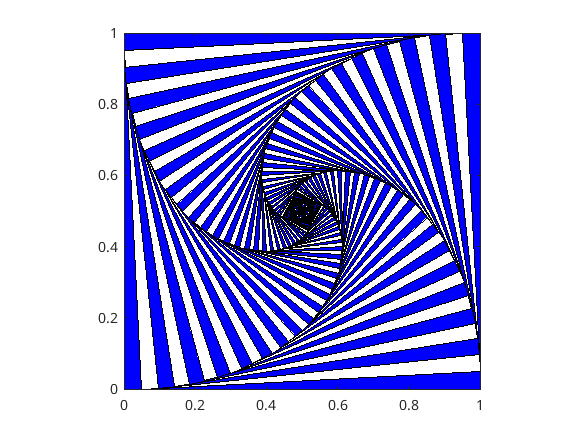

In [19]:
% for square:

sep = 0.05;

ax = 0;
ay = 0;
bx = 1;
by = 0;
cx = 1;
cy = 1;
dx = 0;
dy = 1;

for i=1:100
    % plot the square
    x = [ax bx cx dx ax];
    y = [ay by cy dy ay];
    % plot(x, y, 'k', 'LineWidth', 2)

    % if i%2 == 0, fill the square
    if mod(i,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on

    new_ax = ax * (1-sep) + bx * sep;
    new_ay = ay * (1-sep) + by * sep;
    new_bx = bx * (1-sep) + cx * sep;
    new_by = by * (1-sep) + cy * sep;
    new_cx = cx * (1-sep) + dx * sep;
    new_cy = cy * (1-sep) + dy * sep;
    new_dx = dx * (1-sep) + ax * sep;
    new_dy = dy * (1-sep) + ay * sep;

    ax = new_ax;
    ay = new_ay;
    bx = new_bx;
    by = new_by;
    cx = new_cx;
    cy = new_cy;
    dx = new_dx;
    dy = new_dy;

end

daspect([1 1 1])
hold off

Now try to generalize it:

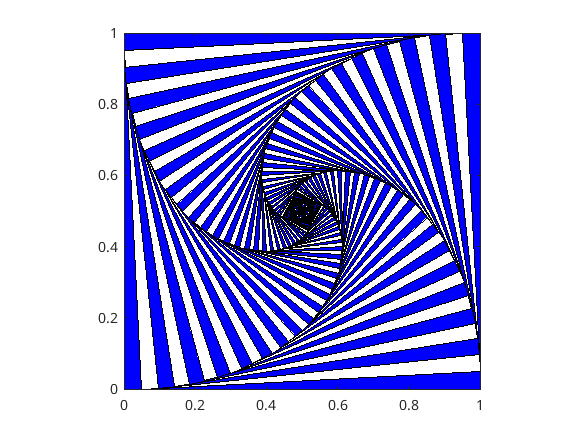

In [30]:
% rewrite the above logic to organize x and y
sep = 0.05;

x = [0 1 1 0 0];
y = [0 0 1 1 0];

for i=1:100
    % plot the square
    % plot(x, y, 'k', 'LineWidth', 2)
    if mod(i,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on

    new_x = x * (1-sep) + [x(2:end) x(2)] * sep;
    new_y = y * (1-sep) + [y(2:end) y(2)] * sep;

    x = new_x;
    y = new_y;
end
daspect([1 1 1])
hold off

More generalization, and fill the colors:

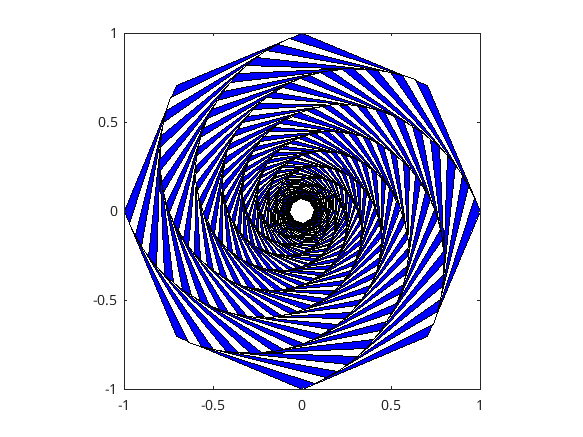

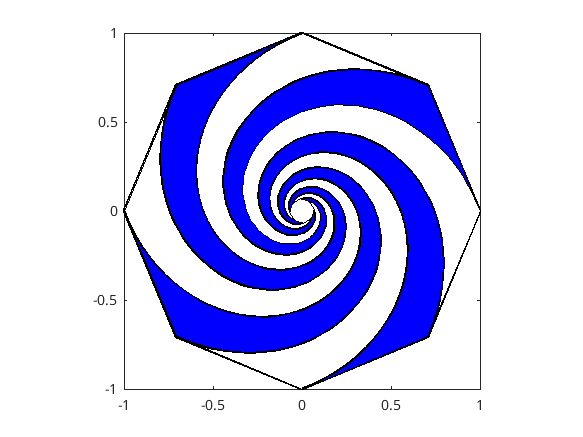

In [6]:
close all;clc;clear;
sep = 0.1;
sides = 8;
steps = 100;

k = 0:sides;
x = cos(2*pi*k/sides);
y = sin(2*pi*k/sides);

x_history = [];
y_history = [];

for i=1:steps
    x_history = [x_history; x];
    y_history = [y_history; y];

    if mod(i,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on

    x = x * (1-sep) + [x(2:end) x(2)] * sep;
    y = y * (1-sep) + [y(2:end) y(2)] * sep;
end
daspect([1 1 1])
hold off



% just the curve:
x = cos(2*pi*k/sides);
y = sin(2*pi*k/sides);
plot(x, y, 'k', 'LineWidth', 2)
hold on

for k=1:sides
    plot(x_history(:,k), y_history(:,k), 'k', 'LineWidth', 2)

    x_history(:,k);
    x_history(:,k+1);
    x = [flipud(x_history(:,k+1)); x_history(:,k)];
    y = [flipud(y_history(:,k+1)); y_history(:,k)];

    if mod(k,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on
end
daspect([1 1 1])
hold off

Setting $n=12,20$, we have:

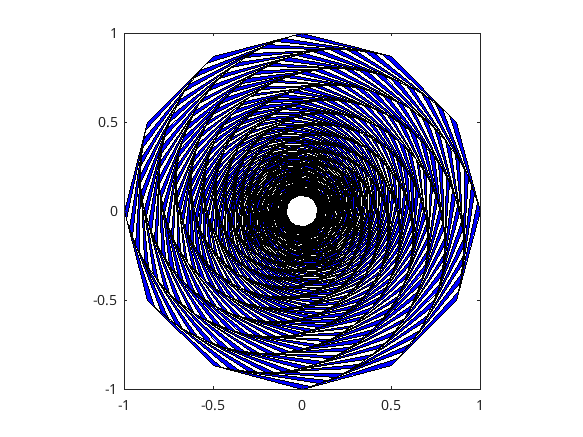

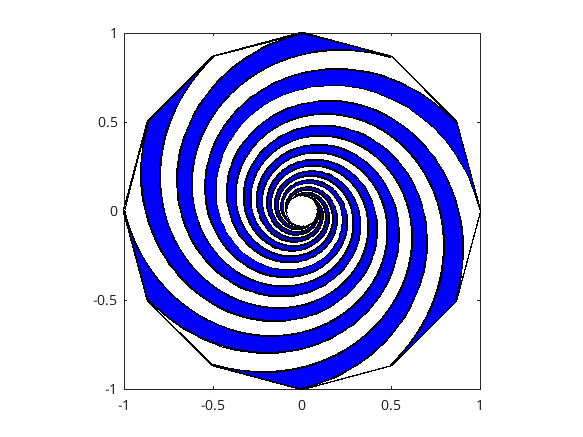

In [8]:
close all;clc;clear;
sep = 0.1;
sides = 12;
steps = 200;

k = 0:sides;
x = cos(2*pi*k/sides);
y = sin(2*pi*k/sides);

x_history = [];
y_history = [];

for i=1:steps
    x_history = [x_history; x];
    y_history = [y_history; y];

    if mod(i,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on

    x = x * (1-sep) + [x(2:end) x(2)] * sep;
    y = y * (1-sep) + [y(2:end) y(2)] * sep;
end
daspect([1 1 1])
hold off



% just the curve:
x = cos(2*pi*k/sides);
y = sin(2*pi*k/sides);
plot(x, y, 'k', 'LineWidth', 2)
hold on

for k=1:sides
    plot(x_history(:,k), y_history(:,k), 'k', 'LineWidth', 2)

    x_history(:,k);
    x_history(:,k+1);
    x = [flipud(x_history(:,k+1)); x_history(:,k)];
    y = [flipud(y_history(:,k+1)); y_history(:,k)];

    if mod(k,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on
end
daspect([1 1 1])
hold off

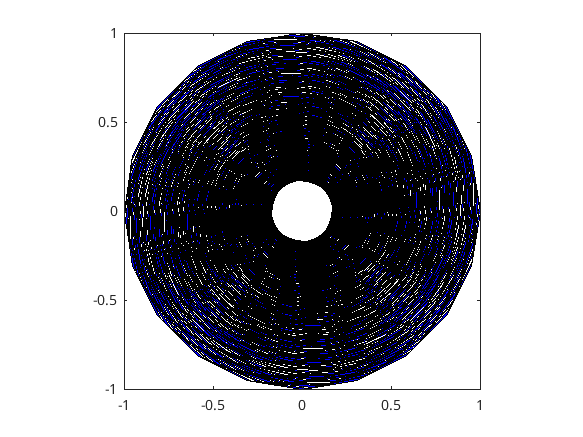

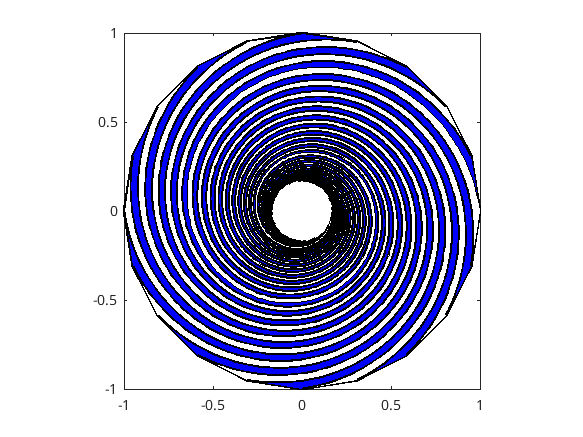

In [9]:
close all;clc;clear;
sep = 0.1;
sides = 20;
steps = 400;

k = 0:sides;
x = cos(2*pi*k/sides);
y = sin(2*pi*k/sides);

x_history = [];
y_history = [];

for i=1:steps
    x_history = [x_history; x];
    y_history = [y_history; y];

    if mod(i,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on

    x = x * (1-sep) + [x(2:end) x(2)] * sep;
    y = y * (1-sep) + [y(2:end) y(2)] * sep;
end
daspect([1 1 1])
hold off



% just the curve:
x = cos(2*pi*k/sides);
y = sin(2*pi*k/sides);
plot(x, y, 'k', 'LineWidth', 2)
hold on

for k=1:sides
    plot(x_history(:,k), y_history(:,k), 'k', 'LineWidth', 2)

    x_history(:,k);
    x_history(:,k+1);
    x = [flipud(x_history(:,k+1)); x_history(:,k)];
    y = [flipud(y_history(:,k+1)); y_history(:,k)];

    if mod(k,2) == 1
        fill(x, y, 'b')
    else
        fill(x, y, 'w')
    end
    hold on
end
daspect([1 1 1])
hold off